In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from classificator import Perceptron

In [2]:
titanic_train_data = pd.read_csv('../datasets/titanic_train.csv')
test_titanic_data  = pd.read_csv('../datasets/titanic_test_set.csv')
titanic_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


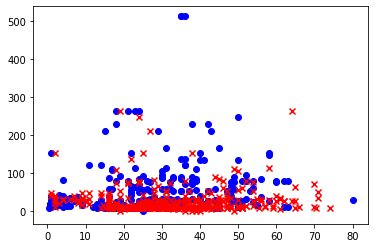

In [3]:
plt.scatter(titanic_train_data[(titanic_train_data.Survived == 1)].Age, titanic_train_data[(titanic_train_data.Survived == 1)].Fare, color='blue', marker='o')
plt.scatter(titanic_train_data[(titanic_train_data.Survived == 0)].Age, titanic_train_data[(titanic_train_data.Survived == 0)].Fare, color='red', marker='x')
plt.show()

In [4]:
# Convert data to work with Perceptron
train_set = titanic_train_data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
train_set['Sex'] = train_set['Sex'].astype('category')
train_set['Sex'] = train_set['Sex'].cat.codes
train_set['Survived'] = np.where(train_set['Survived'] == 0, -1, 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [5]:
nan_values = train_set[train_set.isnull().any(axis=1)]
nan_values

,Pclass,Sex,Age,Fare,Survived
5,3,1,NaN,8.4583,-1
17,2,1,NaN,13.0000,1
19,3,0,NaN,7.2250,1
26,3,1,NaN,7.2250,-1
28,3,0,NaN,7.8792,1
...,...,...,...,...,...
859,3,1,NaN,7.2292,-1
863,3,0,NaN,69.5500,-1
868,3,1,NaN,9.5000,-1
878,3,1,NaN,7.8958,-1


In [6]:
train_set = train_set.dropna()

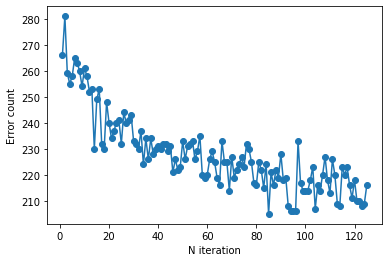

In [7]:
pcp = Perceptron(n_iter=125)
pcp.fit(np.array(train_set[['Pclass', 'Sex', 'Age', 'Fare']]), train_set.Survived)
plt.plot(range(1, len(pcp.errors_) + 1), pcp.errors_, marker='o')
plt.ylabel('Error count')
plt.xlabel('N iteration')
plt.show()

In [9]:
# len(np.where(test_set['Survived'] == test_set['guessed_answer'])[0]) / test_set.shape[0]